In [ ]:
# ADP 출제 및 여러 산업에서 중요
# 데이터 수준(리샘플링), 알고리즘 수준
# 언더샘플링 

In [4]:
import pandas as pd

credit = pd.read_csv("data/credit_final.csv")
X = credit.drop(['credit.rating'],axis=1)
y = credit['credit.rating']


In [5]:
y.value_counts()

1    700
0    300
Name: credit.rating, dtype: int64

<BarContainer object of 2 artists>

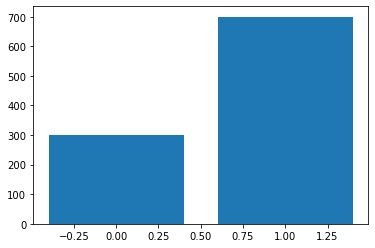

In [6]:
import matplotlib.pyplot as plt 
plt.bar(y.value_counts().index, y.value_counts().values)

In [7]:
import imblearn.under_sampling.base

ModuleNotFoundError: No module named 'imblearn'

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
X_resampled, y_resampled = RandomUnderSampler(random_state=0).fit_resample(X, y)

In [ ]:
plt.bar(y_resampled.value_counts().index, y_resampled.value_counts().values)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=321)
clf = RandomForestClassifier() 
clf.fit(X_train,y_train)

plot_roc_curve(clf, X_test, y_test)

In [ ]:
X_re_train, X_re_test, y_re_train, y_re_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=321)
clf_re = RandomForestClassifier() 
clf_re.fit(X_re_train,y_re_train)

plot_roc_curve(clf_re, X_re_test, y_re_test)

In [3]:
# 어느정도 소수 클래스의 개수가 충족이 된다면, 언더샘플링 전의 ROC_AUC 값이 더 높을 수 있다.
# 클래스의 분균형 차이가 심하면, 언더샘플링 고려 필요
# 꼭 1:1 로 맞췄다고 성능이 좋아지진 않는다.

In [8]:
# 오버샘플링
# SMOTE 적절한 K을 찾기가 어려움(GridSearchCV)

In [9]:
import pandas as pd

credit = pd.read_csv("data/credit_final.csv")
X = credit.drop(['credit.rating'],axis=1)
y = credit['credit.rating']


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, stratify=y, random_state=1004)


In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

X_train = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)

In [ ]:
X_train.shape

In [ ]:
y_train.value_counts()

In [ ]:
from imblearn.over_sampling import SMOTE
# 모델설정
sm = SMOTE( k_neighbors=5)

# train데이터를 넣어 복제함
X_resampled, y_resampled = sm.fit_resample(X_train,y_train)

print('After OverSampling, the shape of train_X: {}'.format(X_resampled.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_resampled.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_resampled==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_resampled==0)))

In [ ]:
from sklearn.svm import SVC
svc1 = SVC(C = 20.00, gamma=0.1, probability=True)
svc1.fit(X_train, y_train)

svc2 = SVC(C = 20.00, gamma=0.1, probability=True)
svc2.fit(X_resampled, y_resampled)


In [ ]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(svc1, X_test, y_test)

In [ ]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(svc2, X_test, y_test)

In [ ]:
# 매개변수 조절에 따라 클래스의 어느정도의 분균형은 성능에 영향을 미치지 않는다.
# 결국 데이터 불균형 처리는 평가지표를 개선시킬 수 있는가?(ROC_AUC 등)에 초점

In [14]:
# 불균형 데이터 처리 실습(기출 문제 22~23회)
# 분류분석, 알고리즘 선택 > 불균형/언더/오버 > 평가지표(ROC_AUC) 비교 > 알맞은 샘플링 기법 판단
# ROC_AUC값이 애매하다면 다시 돌려서 확실한 결과를 보여주는 것이 좋다. + randomState 지정

In [16]:
import pandas as pd
credit = pd.read_csv("data/credit_final.csv")

In [17]:
import numpy as np 
class_1 = credit[credit['credit.rating']==1]
class_0 = credit[credit['credit.rating']==0].sample(50)

In [18]:
credit = pd.concat([class_1,class_0])

In [19]:
X = credit.drop(['credit.rating'],axis=1)
y = credit['credit.rating']

In [20]:
y.value_counts()

1    700
0     50
Name: credit.rating, dtype: int64

C:\Users\KDB\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


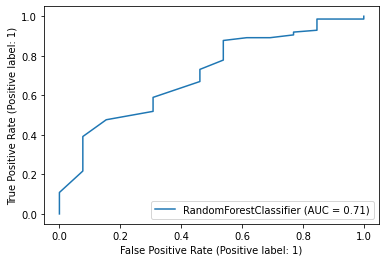

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=321)
clf = RandomForestClassifier(random_state=321) 
clf.fit(X_train,y_train)

plot_roc_curve(clf, X_test, y_test)

In [22]:
from imblearn.under_sampling import RandomUnderSampler
X_resampled, y_resampled = RandomUnderSampler(random_state=0).fit_resample(X_train, y_train)

ModuleNotFoundError: No module named 'imblearn'

In [ ]:
clf_re = RandomForestClassifier(random_state=0) 
clf_re.fit(X_resampled,y_resampled)

plot_roc_curve(clf_re, X_test, y_test)

In [ ]:
from imblearn.over_sampling import SMOTE
# 모델설정
sm = SMOTE( k_neighbors=5,random_state=2020)

# train데이터를 넣어 복제함
X_resampled_over, y_resampled_over = sm.fit_resample(X_train,y_train)

print('After OverSampling, the shape of train_X: {}'.format(X_resampled_over.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_resampled_over.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_resampled_over==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_resampled_over==0)))

In [23]:
clf_over = RandomForestClassifier(random_state=2020) 
clf_over.fit(X_resampled_over,y_resampled_over)

plot_roc_curve(clf_over, X_test, y_test)

# 결과 해석(모범답안)은 강의자료 참고
# 머신러닝 문제는 뻔하다. 데이터 전처리, 전처리 과정 설명(언더,스케일러) - 20분 내 작성 필요

NameError: name 'X_resampled_over' is not defined